In [572]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

In [573]:
data_info = pandas.read_csv("NUSW-NB15_features.csv", encoding = "ISO-8859-1", header=None).values
features = data_info[:]
feature_names = features[:, 1]  # Names of the features in a list
feature_types = np.array([item.lower() for item in features[:, 2]])  # The types of the corresponding features in 'features_names'
 

In [574]:
dataframe1 = pandas.read_csv("UNSW.csv"       , names = feature_names, encoding = "ISO-8859-1", header=None)
dataframe2 = pandas.read_csv("UNSW-NB15_2.csv", names = feature_names, encoding = "ISO-8859-1",header=None)
dataframe3 = pandas.read_csv("UNSW-NB15_3.csv", names = feature_names,   encoding = "ISO-8859-1",header=None)
dataframe4 = pandas.read_csv("UNSW-NB15_4.csv",  names = feature_names,  encoding = "ISO-8859-1",header=None)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [575]:
#concat

dataframe = pandas.concat([dataframe1, dataframe2, dataframe3, dataframe4])

del dataframe1
del dataframe2
del dataframe3
del dataframe4

In [576]:
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [577]:
dataframe['ct_dst_sport_ltm'] = dataframe['ct_dst_sport_ltm'].replace(np.nan,0, regex=True)
dataframe['ackdat'] = dataframe['ackdat'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['ct_state_ttl'] = dataframe['ct_state_ttl'].replace(np.nan, 0, regex=True)
dataframe['ct_flw_http_mthd'] = dataframe['ct_flw_http_mthd'].replace(np.nan, 0, regex=True)
dataframe['is_ftp_login'] = dataframe['is_ftp_login'].replace(np.nan, 0, regex=True)
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [578]:
dataframe['attack_cat'] = dataframe['attack_cat'].replace(np.nan, 'Normal', regex=True)
dataframe['Label'] = dataframe['Label'].replace(np.nan, 0, regex=True)


x = dataframe

In [579]:
dataframe[0:5]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,1,srcip,nominal,Source IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Normal,0.0
1,2,sport,integer,Source port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Normal,0.0
2,3,dstip,nominal,Destination IP address,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Normal,0.0
3,4,dsport,integer,Destination port number,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Normal,0.0
4,5,proto,nominal,Transaction protocol,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Normal,0.0


In [580]:
x = x.dropna()
assert pd.isnull(x).sum().sum() == 0
assert pd.isna(x).sum().sum() == 0

In [581]:
x

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238.0,60788.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174.0,91072.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934.0,3742.0,31.0,...,1,1.0,2.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146.0,178.0,31.0,...,0,13.0,13.0,6.0,7.0,1.0,1.0,2.0,Normal,0.0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928.0,320.0,31.0,...,0,8.0,20.0,7.0,5.0,1.0,1.0,4.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320.0,1828.0,31.0,...,,1.0,2.0,3.0,3.0,1.0,1.0,3.0,Normal,0.0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456.0,346.0,31.0,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Normal,0.0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802.0,2088.0,31.0,...,2,2.0,2.0,4.0,2.0,2.0,2.0,2.0,Normal,0.0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498.0,166054.0,31.0,...,,1.0,1.0,2.0,4.0,2.0,2.0,2.0,Normal,0.0


In [582]:
x.groupby('attack_cat')['attack_cat'].count()

attack_cat
 Fuzzers              19195
 Reconnaissance       12228
 Shellcode             1288
Analysis               2151
Backdoor               1795
DoS                   15186
Exploits              39116
Generic              207959
Normal              1540978
Worms                   150
Name: attack_cat, dtype: int64

In [583]:
# Divide by class 
x_Normal = x[x['attack_cat'] == 'Normal']
x_Generic = x[x['attack_cat'] == 'Generic']
x_Exploits = x[x['attack_cat'] == 'Exploits']


In [584]:

x = pd.concat([x_Normal, x_Generic, x_Exploits], axis=0)


In [585]:
x.drop('srcip', axis=1, inplace=True)
x.drop('sport', axis=1, inplace=True)
x.drop('dstip', axis=1, inplace=True)
x.drop('service', axis=1, inplace=True)
x.drop('dsport', axis=1, inplace=True)
x.drop('ct_ftp_cmd', axis=1, inplace=True)
x.drop('proto', axis=1, inplace=True)
x.drop('state', axis=1, inplace=True)
x['attack_cat'] = x['attack_cat'].astype('category')
x['Label'] = x['attack_cat'].astype('category')
x.drop('attack_cat', axis=1, inplace=True)
cat_columns = x.select_dtypes(['category']).columns
x[cat_columns] = x[cat_columns].apply(lambda x: x.cat.codes)

In [586]:
data = x.values
Y = data[:,39]
X = data[:,0:39]
Y = Y.reshape(-1, 1)

In [587]:
X = StandardScaler().fit_transform(X)

In [588]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
rescaleX = Scaler.fit_transform(X)
pca = PCA(n_components=3)
rescaleX = pca.fit_transform(rescaleX)
rescaleX = np.append(rescaleX, Y, axis=1)
principalDf = pd.DataFrame(data = rescaleX, columns = ['principal component 1', 'principal component 2','principal component 3','Label'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,Label
0,1.950663,0.492055,-1.002073,2.0
1,2.398807,0.956456,-0.948694,2.0
2,2.452269,-0.791785,-0.471173,2.0
3,-0.312984,-1.320191,-1.138031,2.0
4,1.038831,-1.213543,-0.332929,2.0


In [589]:
#2 = x_Normal, 1 = x_Generic, 0 = x_Exploits

principalDf.Label.value_counts()

2.0    1540978
1.0     207959
0.0      39116
Name: Label, dtype: int64

In [590]:
data = principalDf.values
Label = data[:,2]
principalDf.Label.value_counts()

2.0    1540978
1.0     207959
0.0      39116
Name: Label, dtype: int64

In [591]:
names = ['Normal', 'Generic', 'Exploits']
         
         
         

In [592]:
range(len(names))

range(0, 3)

<Figure size 432x288 with 0 Axes>

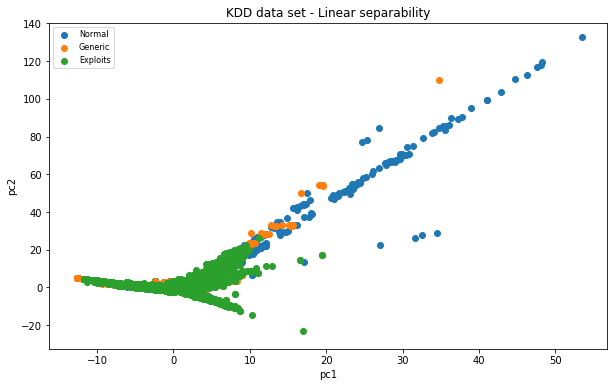

In [593]:

plt.clf()
plt.figure(figsize = (10, 6))
#markers = ['o', 's']
#label = numpy array of target column
plt.title('KDD data set - Linear separability')
plt.xlabel('pc1')
plt.ylabel('pc2')
for i in range(len(names)):
    bucket = principalDf[principalDf['Label'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], Label=names[i]) 
plt.legend(loc='upper left',
           fontsize=8)
plt.show()

<Figure size 432x288 with 0 Axes>

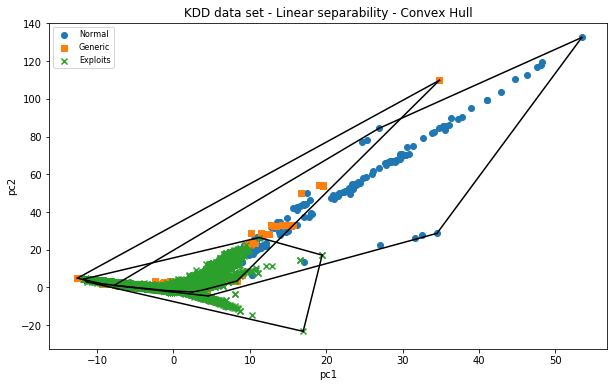

In [595]:

from scipy.spatial import ConvexHull
 
plt.clf()
plt.figure(figsize = (10, 6))
plt.title('KDD data set - Linear separability - Convex Hull')
plt.xlabel('pc1')
plt.ylabel('pc2')
markers = ['o', 's', 'x']
for i in range(len(names)):
    bucket = principalDf[principalDf['Label'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i], marker=markers[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], color='#000000')
plt.legend(loc='upper left',
           fontsize=8)
plt.show()